### Import Package For This Demo Purpose

In [1]:
# Import
import mctthermalface
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

### Load Model Weights

In [2]:
detector = mctthermalface.Detector('thermal_face_detection.pt')

### Load The Image
This time we use 2 different kind of thermal image format
- 3 channels `*jpeg` thermal image (8 bit)
- 1 channels `*csv` thermal image (16 bit). You have to convert it to 8 bit first before using it.

In [3]:
img = Image.open("/mnt/sdb1/Developers-EXT/ThermalFaceDetection/Train/ThermalFace.v2i.coco/test/ades1_png.rf.e01479902230d50ef8633276fb40efaa.jpg")
img_1channels = np.loadtxt("/mnt/sdb1/Developers-EXT/physio_capture/dataset/ades4/thermal/1_20230129_150530_216903.csv", delimiter=",")
img_1channels = cv2.normalize(img_1channels, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

### Detect The Bounding Box

In [4]:
bbox = detector.detect(img)
bbox_1channels = detector.detect(img_1channels)

### Preview The Bounding Box

The bounding box is on a `pascal_voc` bounding box format `(xmin, ymin, xmax, ymax)`

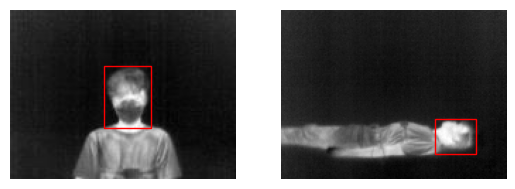

In [6]:
# plot the two image in subplot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax2.imshow(img_1channels, cmap='gray')
# plot the bounding box
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=1, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
rect = patches.Rectangle((bbox_1channels[0], bbox_1channels[1]), bbox_1channels[2] - bbox_1channels[0], bbox_1channels[3] - bbox_1channels[1], linewidth=1, edgecolor='r', facecolor='none')
ax2.add_patch(rect)
# turn off the axes
ax1.axis('off')
ax2.axis('off')
plt.show()